In [40]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from timeit import default_timer as timer
from sklearn.decomposition import PCA

import tensorflow_datasets as tfds

from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns; sns.set()  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from skimage.color import rgb2gray

print(1)

# Load in training data
ds = tfds.load('svhn_cropped', split='train', shuffle_files=False)
X = np.array([example["image"] for example in tfds.as_numpy(ds)])
y = np.array([example["label"] for example in tfds.as_numpy(ds)])
X_gray = rgb2gray(X);

print(2)

# Load in test data
ds_test = tfds.load('svhn_cropped', split='test', shuffle_files=False)
X_test = np.array([example["image"] for example in tfds.as_numpy(ds_test)])
y_test = np.array([example["label"] for example in tfds.as_numpy(ds_test)])

print(3)

# Reformat data for ease of use later
X_flat = np.array(X)
X_flat = np.reshape(X_flat, (np.shape(X_flat)[0], -1))
X_test_flat = np.array(X_test)
X_test_flat = np.reshape(X_test_flat, (np.shape(X_test_flat)[0], -1))

print(4)

1
2
3
4


In [41]:
start = timer();
num_nn = 1;
print('1')

kNN = KNeighborsClassifier(n_neighbors=num_nn).fit(X_flat,y);
print('2')

prediction = kNN.predict(X_test_flat)
#prediction = np.floor(9*np.random.random(np.shape(y_test)))

print(prediction)

end=timer();
print(end-start)

1
2
[1 7 2 ... 3 3 1]
3
acc =  0.06699446834665028
267.2542159000004


In [44]:
print('3')
    
print("acc = ", accuracy_score(y_test, prediction))

print(kNN.score(X_test_flat,y_test))

3
acc =  0.42363245236631836
0.42363245236631836


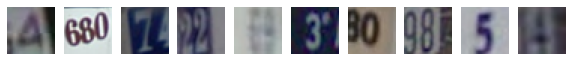

label for each of the above image: [4 8 7 2 6 3 0 8 5 4]


In [47]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_flat[i].reshape(32,32,3),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y[0:10]))

In [ ]:
### Try converting to gray images

In [48]:
X_gray = rgb2gray(X);
X_gray_flat = np.array(X_gray);
X_gray_flat = np.reshape(X_gray_flat, (np.shape(X_gray_flat)[0], -1));
X_gray_test = rgb2gray(X_test);
X_gray_test_flat = np.array(X_gray_test)
X_gray_test_flat = np.reshape(X_gray_test_flat, (np.shape(X_gray_test_flat)[0], -1))

In [50]:
start = timer();
num_nn = 1;
print('1')

kNN_gray = KNeighborsClassifier(n_neighbors=num_nn).fit(X_gray_flat,y);
print('2')

prediction_gray = kNN_gray.predict(X_gray_test_flat)
#prediction = np.floor(9*np.random.random(np.shape(y_test)))

print(prediction)

end=timer();
print(end-start)

1
2
[1 7 2 ... 3 3 1]
268.2191612999959


In [55]:
print('3')

print(np.size(X_test))
print(np.size(y_test))
print(np.size(y_test)*32*32*3)

print("acc = ", accuracy_score(y_test, prediction_gray))

print(kNN_gray.score(X_gray_test_flat,y_test))

3
79970304
26032
79970304
acc =  0.46646435156730176
0.46646435156730176


In [ ]:
### Try PCA on the images

from sklearn.decomposition import PCA

ratioSV = 0.8;
print(np.shape(X))

#u,s,vh = np.linalg.svd(X);

#print(np.size(s))

sumSV = 0;
i=1;

#while sumSV<ratioSV:
 #   sumSV = sumSV + s[i][i]
  #  i=i+1;

pca = PCA(n_components='mle').fit(X_flat);

(73257, 32, 32, 3)


In [70]:
X_transform = pca.transform(X_flat)

print(np.shape(X_flat))
print(np.shape(X_transform))

(73257, 3072)
(73257, 100)
